In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the flowing rates
#assuming productivity index(J) given
#assuming average reservoir pressure(P) given
#assuming bubble point pressure(Pb) given
#assuming well bottom hole pressure(pwf) given

1. #Calculate oil flow rate at bubble point

J = float(input("Enter the value of productivity index(stb/d/psia):"))
P = float(input("Enter average reservoir pressure(psi):"))
Pb = float(input("Enter the valueof bubble point pressure(psi):"))
qob =(J*(P - Pb))
print("The value of oil flow rate at bubble point(b/d):",qob)


Enter the value of productivity index(stb/d/psia): 2
Enter average reservoir pressure(psi): 4200
Enter the valueof bubble point pressure(psi): 3000


The value of oil flow rate at bubble point(b/d): 2400.0


In [5]:

2.#Calculate maximum oil rate

qob = float(input("Enter the value of oil flow rate at bubble point(b/d):"))
qomax = (qob + J*Pb/1.8)
print("The value of maximum oil rate(b/d):", qomax)


Enter the value of oil flow rate at bubble point(b/d): 2400


The value of maximum oil rate(b/d): 5733.333333333333


In [6]:
3.#Calculate oil rate at given well flowing bottom hole pressure

P = float(input("Enter average reservoir pressure(psi):"))
qob = float(input("Enter the value of oil flow rate at bubble point(b/d):"))
qomax = float(input("Enter the value of maximum oil rate(b/d):"))
pwf = float(input("Enter the value of well flowing bottom hole pressure(psi):"))
qo = qob+(qomax-qob)*(1-0.2*pwf/P-0.8*(pwf/P)**2)
print("The value of oil rate at given well flowing bottom hole pressure(b/d):",qo)



Enter average reservoir pressure(psi): 4200
Enter the value of oil flow rate at bubble point(b/d): 2400
Enter the value of maximum oil rate(b/d): 5733
Enter the value of well flowing bottom hole pressure(psi): 1500


The value of oil rate at given well flowing bottom hole pressure(b/d): 5154.826530612245


In [17]:
a = np.arange(0,2500,50)
b = np.append(a,3000)
pwf = b[-1::-1]
pwf

array([3000, 2450, 2400, 2350, 2300, 2250, 2200, 2150, 2100, 2050, 2000,
       1950, 1900, 1850, 1800, 1750, 1700, 1650, 1600, 1550, 1500, 1450,
       1400, 1350, 1300, 1250, 1200, 1150, 1100, 1050, 1000,  950,  900,
        850,  800,  750,  700,  650,  600,  550,  500,  450,  400,  350,
        300,  250,  200,  150,  100,   50,    0])

In [23]:
flowrate=[]
for i in pwf:
    q = qomax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)
flowrates = np.array(flowrate) 
flowrates

array([2574. , 3503.5, 3580.2, 3655.6, 3729.7, 3802.5, 3874. , 3944.2,
       4013.1, 4080.7, 4147. , 4212. , 4275.7, 4338.1, 4399.2, 4459. ,
       4517.5, 4574.7, 4630.6, 4685.2, 4738.5, 4790.5, 4841.2, 4890.6,
       4938.7, 4985.5, 5031. , 5075.2, 5118.1, 5159.7, 5200. , 5239. ,
       5276.7, 5313.1, 5348.2, 5382. , 5414.5, 5445.7, 5475.6, 5504.2,
       5531.5, 5557.5, 5582.2, 5605.6, 5627.7, 5648.5, 5668. , 5686.2,
       5703.1, 5718.7, 5733. ])

In [25]:
df = pd.DataFrame(flowrates,pwf)
df

,0
3000,2574.0
2450,3503.5
2400,3580.2
2350,3655.6
2300,3729.7
2250,3802.5
2200,3874.0
2150,3944.2
2100,4013.1
2050,4080.7


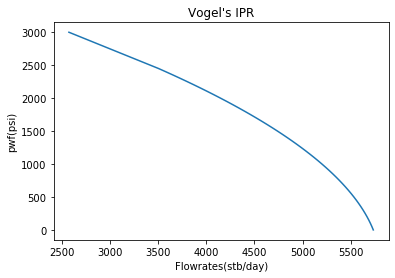

In [26]:
plt.figure()
plt.plot(flowrates,pwf)
plt.xlabel("Flowrates(stb/day)")
plt.ylabel("pwf(psi)")
plt.title("Vogel's IPR")
plt.show()